In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils


In [20]:
# Load dataset
dataset = pd.read_csv('../featureSelectedDataset.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,11.947431,0.801756,51.614,35.807860,73.15,48.66,0.111816,48.634625,90.574,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,4.605392,3.168264,20.500,61.654161,34.23,61.43,0.021999,49.604197,16.890,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,20.065391,0.229381,18.500,48.662900,93.29,72.46,0.811334,53.270334,35.038,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,8.691025,0.378911,45.799,0.000000,18.74,35.63,0.709471,52.189871,88.199,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,1.237884,0.336018,43.539,0.247525,24.62,20.76,0.126465,50.360061,62.043,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [21]:
# Split the dataset into features and obs

X = dataset.iloc[:,0:10]
y = dataset["Life expectancy at birth, total (years)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population)
2915,80.5754,7.263923,0.151711,20.629,1.748401,90.11,116.38,2.421308,49.750843,35.172
4266,42.2912,40.680551,0.412794,10.200,30.487134,85.30,101.25,2.374521,50.905430,46.384
567,64.5202,10.078848,0.625916,20.873,1.641414,37.70,59.90,0.274254,50.321066,17.430
1873,21.0448,0.453153,0.285130,19.209,79.507074,97.69,87.75,0.001287,50.173043,39.622
2602,130.4370,11.289230,0.240836,42.023,1.226242,109.53,98.54,1.862723,50.363773,73.879


In [23]:
y_train.head()

2915    76.676951
4266    69.104878
567     68.730366
1873    64.296268
2602    58.077780
Name: Life expectancy at birth, total (years), dtype: float64

In [24]:
kreg = KNeighborsRegressor(n_neighbors = 3)
kreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
y_pred = kreg.predict(X_test)

In [26]:
print('Accuracy training : {:.3f}'.format(kreg.score(X_train, y_train)))
print('Accuracy testing : {:.3f}'.format(kreg.score(X_test, y_test)))

Accuracy training : 0.991
Accuracy testing : 0.978


In [31]:
residuals = y_pred-y_test
residuals
residuals.shape, X_test.shape

((2066,), (2066, 10))

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [32]:
X_test.iloc[:,0]

2304     47.2200
3621     38.4210
5821      9.9630
2707     32.1248
2596    106.6170
          ...   
3737     16.5984
679     147.3200
2955     22.6162
4041     96.3600
1211     52.2766
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), Length: 2066, dtype: float64

In [28]:
X_test.columns[0]


'Adolescent fertility rate (births per 1,000 women ages 15-19)'

In [29]:
def residual(x,y,title,folder):
    isExist = os.path.exists(folder)

    if not isExist:

      # Create a new directory because it does not exist 
      os.makedirs(folder)
    f = plt.figure()
    f = plt.scatter(x, y)
    plt.title(title)
    plt.savefig(folder + '/' + title + '.png', bbox_inches='tight', dpi=300)

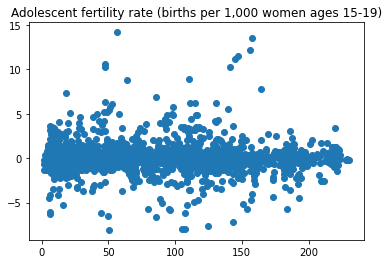

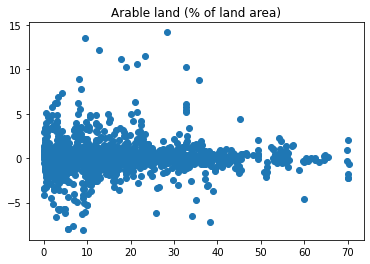

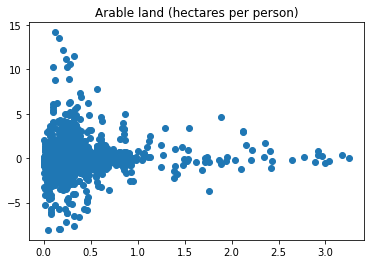

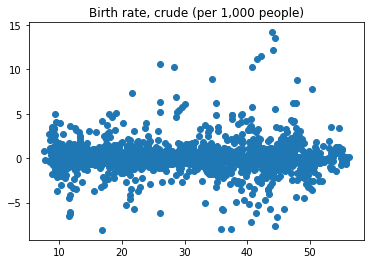

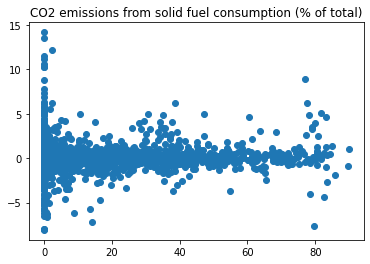

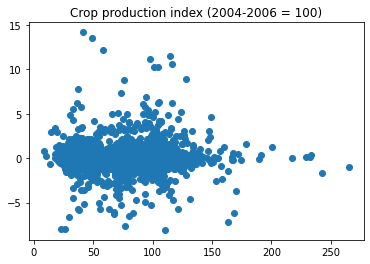

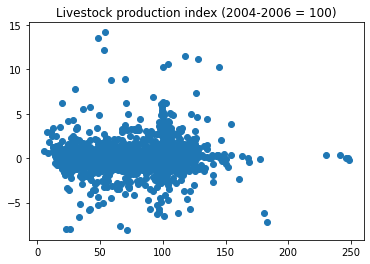

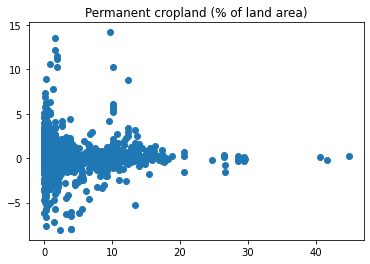

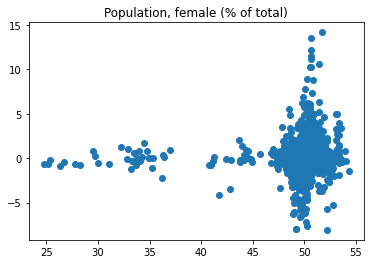

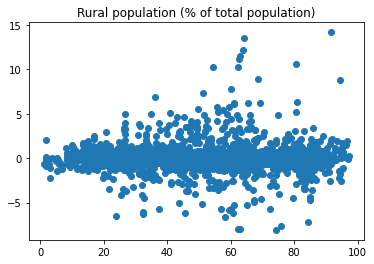

In [33]:
for index in range(0,10):
    residual(X_test.iloc[:,index], residuals,X_test.columns[index],'KNNRegression')